# CISC490 Competition No. 1

#### Questions:
1. Is the bus service accessible to everyone in Kingston (walk, bike, park, and ride to a bus stop)?
2. Are there some redundant bus routes that can be cancelled?
3. Assume that each driveway has two cars and that all people work in downtown Kingston, how many new bus routes are needed to make people leave their cars at home? How much would that reduce the gas emissions (make your own reasonable assuptions)?
4. Is there anything else you find interesting in the daya that can help planning the bus routes?

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from haversine import haversine

In [24]:
# read and preview civic address dataset
addresses = pd.read_csv("Civic_Address.csv")
addresses.head()

,ADDR_NUM,STR_NAME,STR_TYPE,DIRECT_SUF,A_NUM_SUF,UNIT,STREET,MUNICIP,UNIT_TYPE,GARBAGE_D,ELEC_DIST,NEIGHBRHD,RECYCLE_D,POSTAL_COD,GeoJSON
0,992,RICK HANSEN,CRES,NaN,NaN,NaN,RICK HANSEN CRES,KINGSTON,BASE,Wednesday,Loyalist-Cataraqui,Westwoods,WEDNESDAY-1,K7P 2M3,"{""type"":""Point"",""coordinates"":[371569.2596,490..."
1,920,KING,ST,W,A,NaN,KING ST W,KINGSTON,UNIT,Monday,Portsmouth,Fairway Hills,MONDAY-2,K7M 9G9,"{""type"":""Point"",""coordinates"":[377748.179,4897..."
2,182,BRICELAND,ST,NaN,NaN,NaN,BRICELAND ST,KINGSTON,BASE,Thursday,Cataraqui,Rideau Heights,THURSDAY-1,K7K 7L2,"{""type"":""Point"",""coordinates"":[381037.6952,490..."
3,937,SUNBURY,RD,NaN,NaN,NaN,SUNBURY RD,KINGSTON,BASE,Tuesday,Countryside,Joyceville-Brewers Mills,TUESDAY-1,NaN,"{""type"":""Point"",""coordinates"":[395611.8025,491..."
4,164,BRICELAND,ST,NaN,NaN,NaN,BRICELAND ST,KINGSTON,BASE,Thursday,Cataraqui,Rideau Heights,THURSDAY-1,K7K 7L2,"{""type"":""Point"",""coordinates"":[381119.4111,490..."


In [23]:
# read and preview stops dataset
stops = pd.read_csv("stops.txt")
stops.head()

,stop_id,stop_name,stop_lat,stop_lon
0,S02077,Cataraqui Centre Transfer Point Platform 1,44.255201,-76.572360
1,00799,Norwest Road (east side of Midland),44.257216,-76.574003
2,00842,O'Connor Drive (east side of Gardiners),44.259691,-76.568480
3,00841,Norris Court (east side of Gardiners),44.263105,-76.568621
4,00848,640 Cataraqui Woods Drive (south side),44.266914,-76.567121


## Question 1: Is the bus service accessible to everyone in Kingston (walk, bike, park, and ride to a bus stop)?

#### Converting Civic Addresses to Valid Longitude/Longitude Coordinates

In [ ]:
# script for google api

#### Calculating Distance Between Two Points Using the Haversine Formula
https://en.wikipedia.org/wiki/Haversine_formula

In [26]:
# EXAMPLE
# get latitude and longitude for first two stops in stops.txt
a = (stops["stop_lat"][0], stops["stop_lon"][0])
b = (stops["stop_lat"][1], stops["stop_lon"][1])
print("Coordinates for stop a:", a)
print("Coordinates for stop b:", b)

Coordinates for stop a: (44.255201099440498, -76.572360014542994)
Coordinates for stop b: (44.257215857505798, -76.574003370478792)


In [27]:
# EXAMPLE
# calculate the haversine distance between a and b
dist_ab = haversine(a, b)
print("Distance between stop a and stop b:", dist_ab)

Distance between stop a and stop b: 0.2594588657944471


## October Transit Data

In [99]:
october = pd.read_csv("october_transit.csv")
october.head()

,Date,Time,Class,Operation,Bus,Route,Latitude,Longitude
0,2017-10-01 0:00,1900-01-01 1:43,QUEENS,Exact Fare,620,17,44.227860,-76.496938
1,2017-10-01 0:00,1900-01-01 1:43,QUEENS,Exact Fare,620,17,44.227860,-76.496938
2,2017-10-01 0:00,1900-01-01 1:58,ADULT,Pass (Multi-ride card),620,17,44.232035,-76.491397
3,2017-10-01 0:00,1900-01-01 1:58,QUEENS,Exact Fare,620,17,44.232035,-76.491397
4,2017-10-01 0:00,1900-01-01 1:58,QUEENS,Exact Fare,620,17,44.232035,-76.491397


In [100]:
october["Date"].unique()

array(['2017-10-01 0:00', '2017-10-02 0:00', '2017-10-03 0:00',
       '2017-10-04 0:00', '2017-10-05 0:00', '2017-10-06 0:00',
       '2017-10-07 0:00', '2017-10-08 0:00', '2017-10-09 0:00',
       '2017-10-10 0:00', '2017-10-11 0:00', '2017-10-12 0:00',
       '2017-10-13 0:00', '2017-10-14 0:00', '2017-10-15 0:00',
       '2017-10-16 0:00', '2017-10-17 0:00', '2017-10-18 0:00',
       '2017-10-19 0:00', '2017-10-20 0:00', '2017-10-21 0:00',
       '2017-10-22 0:00', '2017-10-23 0:00', '2017-10-24 0:00',
       '2017-10-25 0:00', '2017-10-26 0:00', '2017-10-27 0:00',
       '2017-10-28 0:00', '2017-10-29 0:00', '2017-10-30 0:00',
       '2017-10-31 0:00'], dtype=object)

In [101]:
october["Class"].unique()

array(['QUEENS', 'ADULT', 'Youth', 'ST LAWRENCE', 'Child', 'Transpass',
       'SENIOR', 'Student', 'YOUTH', 'Commuter', 'CHILD'], dtype=object)

In [102]:
october["Operation"].unique()

array(['Exact Fare', 'Pass (Multi-ride card)', 'Rides (Multi-ride card)',
       'Transfer - Rides (Multi-ride card)',
       'Transfer - Pass (Multi-ride card)', 'Transfer - Printed Ticket '], dtype=object)

In [103]:
october["Bus"].unique()

array([ 620, 1687, 1362, 1372, 1364, 1479,  622, 1684, 1368, 1046, 1683,
       1689, 1365,  623, 1367,  729, 1482,  835,  942, 1049,  944, 1359,
        728, 1050,  624, 1257, 1475, 1481,  834, 1369, 1047,  943, 1048,
       1686, 1502, 1258,  836, 1480, 1506, 1254, 1476,  832, 1510, 1688,
       1361, 1256, 1255, 1509, 1370,  833, 1477, 1366, 1504, 1685, 1363,
       1051, 1474, 1360,  315, 1478, 1373, 1253,  945,  519])

In [104]:
october["Route"].unique()

array([ 17,   7, 701,  15, 501, 502,   1, 601,   4,   3,  11,   2,  12,
        16,  10,  18,  13,   6,  14,  20,   8])

In [105]:
d = {}
for i in october[october["Date"]=="2017-10-01 0:00"]["Time"]:
    if i[-5] == " ":
        time = int(i[-4])
        if time not in d:
            d[time] = 1
        else:
            d[time] += 1
    else:
        time = int(i[-5:-3])
        if time not in d:
            d[time] = 1
        else:
            d[time] += 1

In [109]:
d_list = [(key, d[key]) for key in d.keys()]
d_list = sorted(d_list)
x = [i[0] for i in d_list]
y = [i[1] for i in d_list]

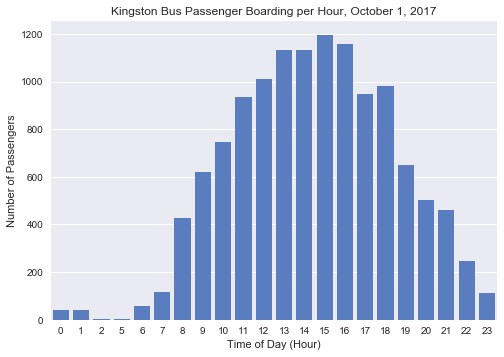

In [133]:
# plot passengers per hour for oct 1
sns.set_color_codes(palette='muted')
sns.barplot(x, y, color="b")
plt.title("Kingston Bus Passenger Boarding per Hour, October 1, 2017")
plt.ylabel("Number of Passengers")
plt.xlabel("Time of Day (Hour)")
plt.show()

In [134]:
d = {}
for i in october["Time"]:
    if i[-5] == " ":
        time = int(i[-4])
        if time not in d:
            d[time] = 1
        else:
            d[time] += 1
    else:
        time = int(i[-5:-3])
        if time not in d:
            d[time] = 1
        else:
            d[time] += 1

In [135]:
d_list = [(key, d[key]/31) for key in d.keys()]
d_list = sorted(d_list)
x = [i[0] for i in d_list]
y = [i[1] for i in d_list]

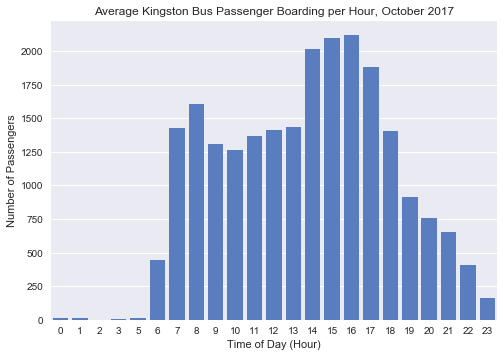

In [136]:
sns.set_color_codes(palette='muted')
sns.barplot(x, y, color="b")
plt.title("Average Kingston Bus Passenger Boarding per Hour, October 2017")
plt.ylabel("Number of Passengers")
plt.xlabel("Time of Day (Hour)")
plt.show()